In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv(r"C:\Users\sreer\Desktop\introtalent\python\Data Files used in Projects\House_Prices.csv")

In [3]:
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790.0,2,2,2,No,East
1,2,114200,2030.0,4,2,3,No,East
2,3,114800,1740.0,3,2,1,No,East
3,4,94700,1980.0,3,2,3,No,East
4,5,119800,2130.0,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900.0,3,3,3,Yes,East
124,125,147900,2160.0,4,3,3,Yes,NaN
125,126,113500,2070.0,2,2,2,No,North
126,127,149900,2020.0,3,3,1,No,West


# understand the data

In [3]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790.0,2,2,2,No,East
1,2,114200,2030.0,4,2,3,No,East
2,3,114800,1740.0,3,2,1,No,East
3,4,94700,1980.0,3,2,3,No,East
4,5,119800,2130.0,3,3,3,No,East


In [4]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

# Variable description

* Target variable (y) : price
* INdependent variable (x) : 
    * Home
    * SqFt
    * Bedrooms
    * Offers
    * Brick
    * Neighbourhood

In [5]:
df.dtypes

Home              int64
Price             int64
SqFt            float64
Bedrooms          int64
Bathrooms         int64
Offers            int64
Brick            object
Neighborhood     object
dtype: object

In [6]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,127.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,1997.716535,3.023438,2.445312,2.578125
std,37.094474,26868.770371,209.235908,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [7]:
df['Bedrooms']=df["Bedrooms"].astype("object")
df["Bathrooms"]=df['Bathrooms'].astype("object")
df["Offers"]=df['Offers'].astype("object")

In [8]:
#we are converting the numeric to categorical data because we can then group by this data.

In [9]:
df.dtypes

Home              int64
Price             int64
SqFt            float64
Bedrooms         object
Bathrooms        object
Offers           object
Brick            object
Neighborhood     object
dtype: object

In [10]:
df.isnull().sum()

Home            0
Price           0
SqFt            1
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    1
dtype: int64

In [11]:
#there is a missing value in SqFt and Neighborhood

In [12]:
df=df.dropna(axis=0)

In [13]:
df.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [14]:
#checking outliers

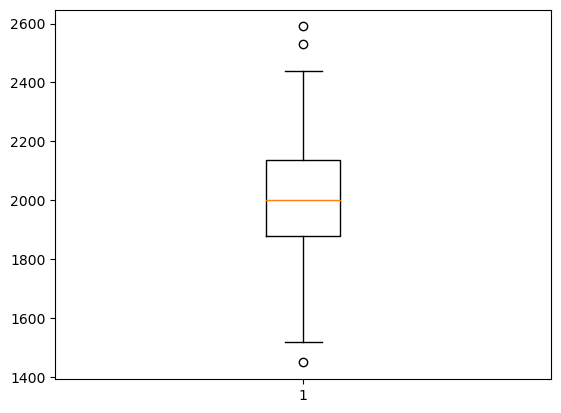

In [15]:
plt.boxplot(df['SqFt'])
plt.show()

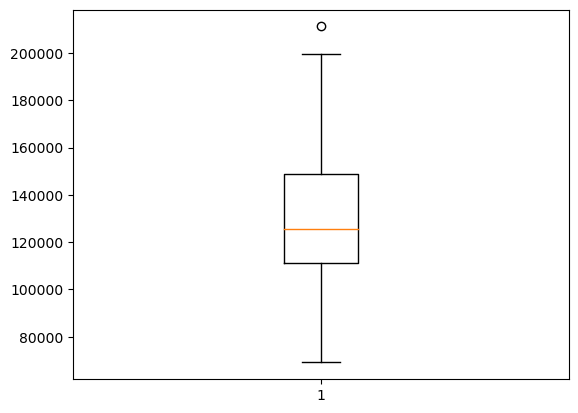

In [16]:
plt.boxplot(df['Price'])
plt.show()

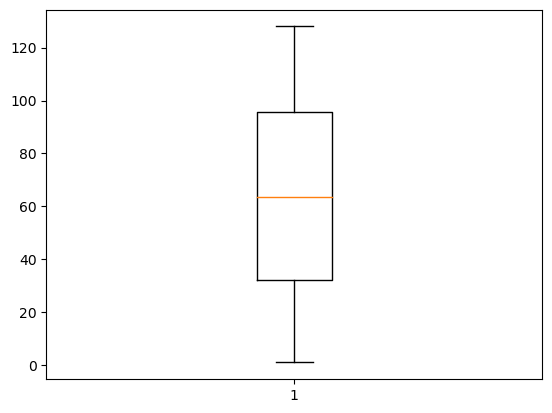

In [17]:
plt.boxplot(df['Home'])
plt.show()

In [18]:
#removing the outliers

def remove_outliers(d,c):
 # d is dataframe and c is column
    
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    iqr=q3-q1
    
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    data_without_outliers=d[(d[c]<=ub) & (d[c]>=lb)]
    
    return data_without_outliers

<function matplotlib.pyplot.show(close=None, block=None)>

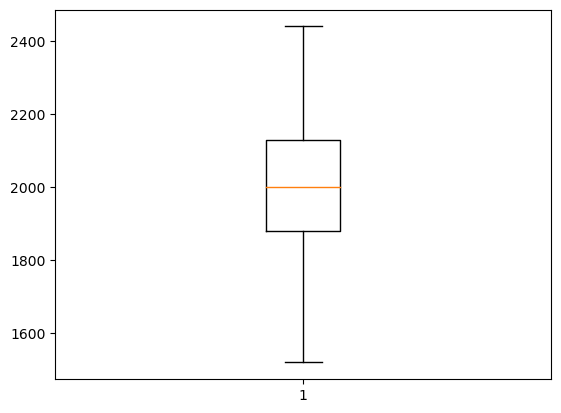

In [19]:
df=remove_outliers(df,"SqFt")

plt.boxplot(df['SqFt'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

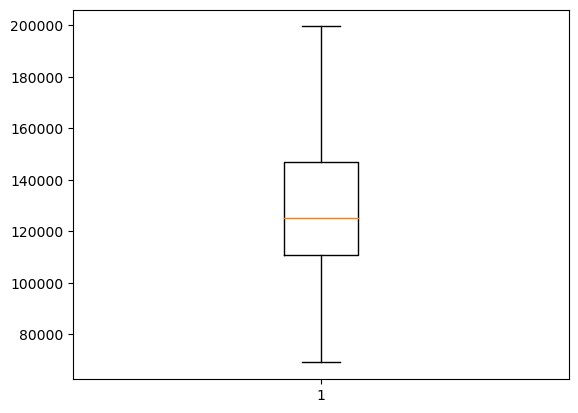

In [20]:
df=remove_outliers(df,"Price")

plt.boxplot(df['Price'])
plt.show

# checking EDA

* distribution
* datamix
* correlation

In [21]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [22]:
df.shape

(122, 8)

In [23]:
df.dtypes

Home              int64
Price             int64
SqFt            float64
Bedrooms         object
Bathrooms        object
Offers           object
Brick            object
Neighborhood     object
dtype: object

C:\Users\sreer\AppData\Local\Temp\ipykernel_5676\1113660390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SqFt'])


<Axes: xlabel='SqFt', ylabel='Density'>

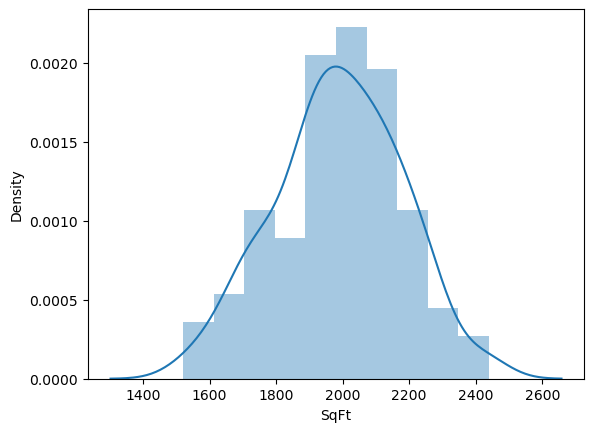

In [24]:
sns.distplot(df['SqFt'])

C:\Users\sreer\AppData\Local\Temp\ipykernel_5676\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

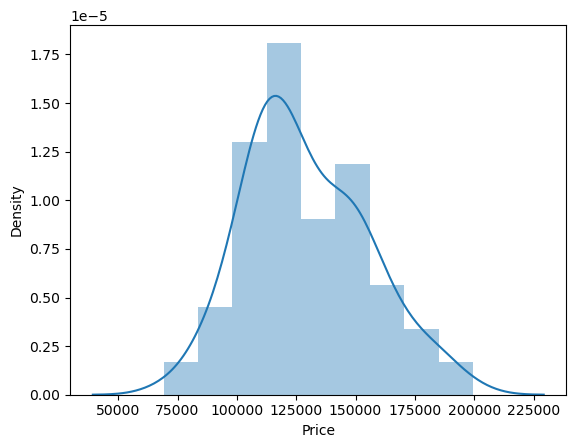

In [25]:
sns.distplot(df['Price'])

C:\Users\sreer\AppData\Local\Temp\ipykernel_5676\4165722021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Home"])


<Axes: xlabel='Home', ylabel='Density'>

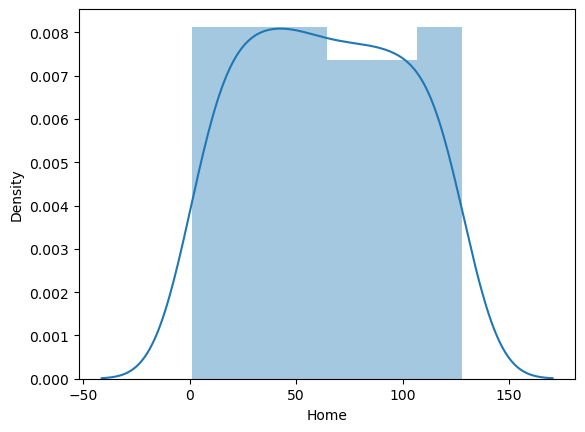

In [26]:
sns.distplot(df["Home"])

In [27]:
#check data mix for that we have to take the categorical data
#Bedrooms, bathroom, bricks, offer, Neighbourhood

<Axes: xlabel='Offers'>

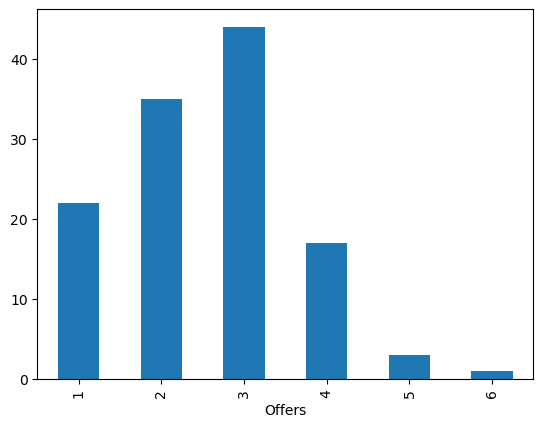

In [28]:
df.groupby('Offers')['Offers'].count().plot(kind='bar')

<Axes: xlabel='Neighborhood'>

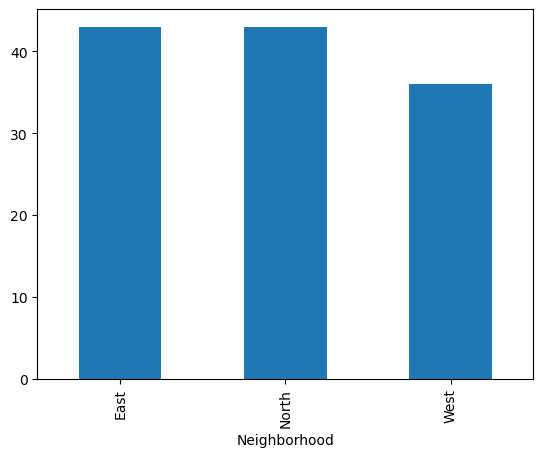

In [29]:
df.groupby('Neighborhood')['Neighborhood'].count().plot(kind='bar')

<Axes: xlabel='Brick'>

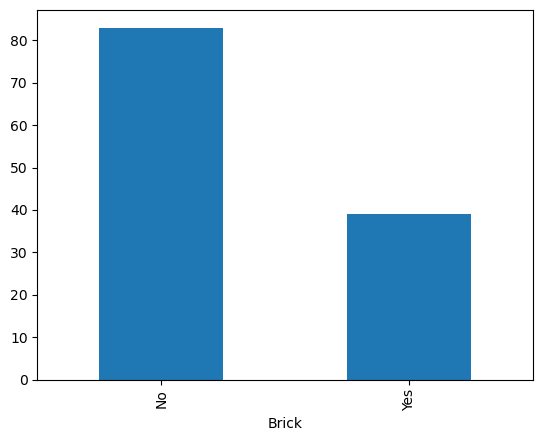

In [30]:
df.groupby('Brick')['Brick'].count().plot(kind='bar')

<Axes: xlabel='Bedrooms'>

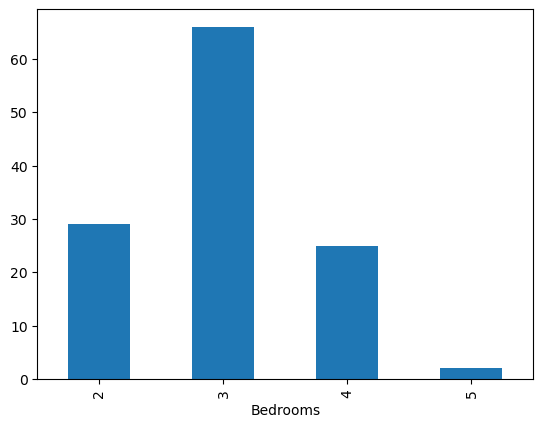

In [31]:
df.groupby('Bedrooms')['Bedrooms'].count().plot(kind='bar')

<Axes: xlabel='Bathrooms'>

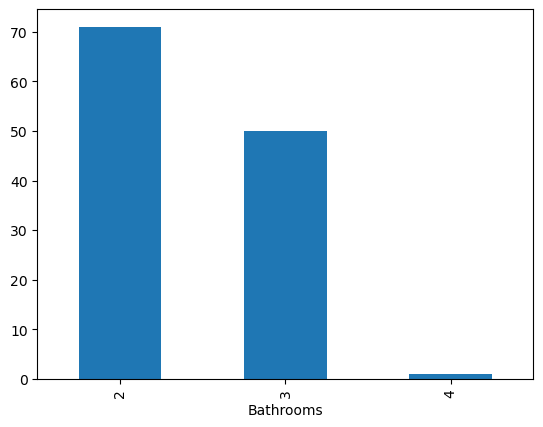

In [32]:
df.groupby('Bathrooms')["Bathrooms"].count().plot(kind="bar")

# Pearson corelation

In [45]:
#create a set of numeric column
df_numeric=df.select_dtypes(include=["int64","float64"])
df_numeric.head()

,Home,Price,SqFt
0,1,114300,1790.0
1,2,114200,2030.0
2,3,114800,1740.0
3,4,94700,1980.0
4,5,119800,2130.0


<Axes: >

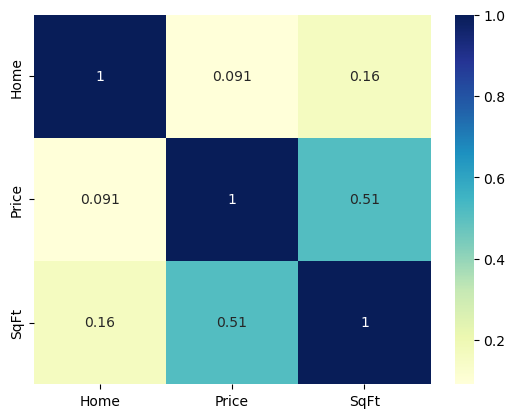

In [35]:
#create a heatmap
sns.heatmap(df_numeric.corr(),cmap="YlGnBu", annot=True)

In [36]:
#using pearson test i found the key factors (sqrt,price,)

In [37]:
#---------------------------------EDA end---------------------------------------------

In [54]:
#checking any categorical mistakes
#like spelling mistakes, case sensitive values

In [55]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [56]:
df['SqFt'].unique()

array([1790., 2030., 1740., 1980., 2130., 1780., 1830., 2160., 2110.,
       1730., 1870., 1910., 2150., 2190., 1990., 1700., 1920., 2000.,
       1690., 1820., 2210., 2290., 1600., 2040., 2250., 1930., 2280.,
       2080., 1880., 2420., 1720., 1560., 1840., 1940., 1810., 2050.,
       2100., 1860., 1650., 2240., 2090., 2200., 1610., 2220., 2140.,
       1950., 1900., 1520., 2010., 1970., 2440., 2060., 2260., 2410.,
       1890., 1710., 2070., 2020.])

In [57]:
df['Brick'].unique()

array(['No', 'Yes'], dtype=object)

In [58]:
df['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

In [59]:
df['Bedrooms'].unique()

array([2, 4, 3, 5], dtype=object)

In [60]:
df['Bathrooms'].unique()

array([2, 3, 4], dtype=object)

In [61]:
df['Offers'].unique()

array([2, 3, 1, 4, 5, 6], dtype=object)

In [62]:
df['Home'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 105, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 126, 127, 128], dtype=int64)

In [63]:
df['Price'].unique()

array([114300, 114200, 114800,  94700, 119800, 114600, 151600, 150700,
       119200, 104000, 132500, 123000, 102600, 126300, 145800, 147100,
        83600, 111400, 167200, 116200, 113800,  91700, 106100, 156400,
       149300, 137000,  99300,  69100, 188000, 182000, 112300, 135000,
       139600, 117800, 117100, 117500, 147000, 131300, 108200, 106600,
       133600, 105600, 154000, 166500, 103200, 129800,  90300, 115900,
       107500, 151100,  91100, 117400, 130800,  81300, 125700, 140900,
       152300, 138100, 155400, 180900, 100900, 161300, 120500, 130300,
       126200, 151900,  93600, 165600, 166700, 157600, 107300, 144200,
       106900, 176500, 121300, 143600, 143400, 184300, 164800,  90500,
       188300, 102700, 172500, 127700,  97800, 143100, 116500, 142600,
       157100, 160600, 152500, 133300, 126800, 145500, 171000, 123100,
       136800,  82300, 108500, 134000, 117000, 108700, 111600, 114900,
       123600, 115700, 124500, 102500, 199500, 150200, 109700, 110400,
      

In [64]:
df.dtypes

Home              int64
Price             int64
SqFt            float64
Bedrooms         object
Bathrooms        object
Offers           object
Brick            object
Neighborhood     object
dtype: object

# Dummy Conversion (One-hot encoding)

In [65]:
#create a new df to store categorical variables in dummy conversion
df_categorical=df.select_dtypes(include='object')
df_categorical.head

<bound method NDFrame.head of     Bedrooms Bathrooms Offers Brick Neighborhood
0          2         2      2    No         East
1          4         2      3    No         East
2          3         2      1    No         East
3          3         2      3    No         East
4          3         3      3    No         East
..       ...       ...    ...   ...          ...
122        2         2      1   Yes         East
123        3         3      3   Yes         East
125        2         2      2    No        North
126        3         3      1    No         West
127        3         3      4    No        North

[122 rows x 5 columns]>

In [66]:
df.head(4)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790.0,2,2,2,No,East
1,2,114200,2030.0,4,2,3,No,East
2,3,114800,1740.0,3,2,1,No,East
3,4,94700,1980.0,3,2,3,No,East


In [67]:
df_dummy=pd.get_dummies(df_categorical)
df_dummy.head()

,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_2,Bathrooms_3,Bathrooms_4,Offers_1,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False
1,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False
3,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False
4,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False


In [68]:
#combine data frame df_numeric and df_dummy
df_final=pd.concat([df_numeric,df_dummy], axis=1)
df_final.head()

,Home,Price,SqFt,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_2,Bathrooms_3,Bathrooms_4,...,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1,114300,1790.0,True,False,False,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
1,2,114200,2030.0,False,False,True,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,3,114800,1740.0,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
3,4,94700,1980.0,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
4,5,119800,2130.0,False,True,False,False,False,True,False,...,False,True,False,False,False,True,False,True,False,False


In [69]:
#Create x and y

x=df_final.drop("Price", axis=1)

y=df_final['Price']

In [70]:
# Train and test the sample
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3,random_state=999)

In [71]:
#check sample size
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(85, 20) (37, 20) (85,) (37,)


# Feature selection

select significant variables

In [72]:
#create key_features object to select the top k features
key_features=SelectKBest(score_func=f_regression,k=5) #to select 5  sig variables


#Fit the key_features to the trainig data and transform it
xtrain_selected= key_features.fit_transform(xtrain,ytrain)

#Get the names of the selected features
selected_indices=key_features.get_support(indices=True)

#get the names of the selected features
selected_features= xtrain.columns[selected_indices]

In [73]:
#print the significant variables
selected_features

Index(['SqFt', 'Brick_No', 'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West'],
      dtype='object')

In [74]:
#now we want all rows of the sig variables so we take all
xtrain_selected=xtrain.iloc[:,selected_indices]

# Build Linear Regression Model

In [75]:
#instantiate the linear regression function
linreg=LinearRegression()

#fit the model using train variable
linreg.fit(xtrain_selected,ytrain)

#print the accuracy of the training model
linreg.score(xtrain_selected,ytrain)

0.7626255124469659

In [76]:
#Evaluate the model on the test set using the selected features

xtest_selected=xtest.iloc[:,selected_indices]
score=linreg.score(xtest_selected,ytest)
score

0.7928581639097382

In [77]:
#predict  the price based on xtest
predicted_price=linreg.predict(xtest_selected)

#check accuracy of the test model
linreg.score(xtest_selected, ytest)

0.7928581639097382

In [78]:
predicted_price

array([127690.12694421, 143710.05176907, 134690.40578733, 108826.16226731,
       105819.61360673, 171593.66242772, 106065.09549389, 121281.86386114,
       169016.62071865, 112262.2178794 , 116802.76928167, 108826.16226731,
       112078.19281505, 104531.09275219, 155306.73945988, 176318.23889435,
       156165.7533629 , 114655.23452412, 142109.33823126, 106065.09549389,
       135237.22700707, 109255.66921882, 142109.33823126, 157024.76726593,
       162144.50949447, 177606.75974888, 103672.07884917, 133983.04734214,
       102199.53293028, 167728.09986412, 139844.48920547, 167298.5929126 ,
        96370.46067347, 108396.65531579, 129224.12968591, 103917.56073633,
       114225.72757261])

In [79]:
#y=B0+Bx
#print B0 
linreg.intercept_

38615.3335117792

In [80]:
#print Beta values  
linreg.coef_

array([   42.95069515, -9431.98233845,  9431.98233845, -6258.57920832,
       31631.85895402])

In [81]:
df.head(3)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790.0,2,2,2,No,East
1,2,114200,2030.0,4,2,3,No,East
2,3,114800,1740.0,3,2,1,No,East
